# Data Visualization

**If you are a Colab user**

If you use Google Colab, you can uncomment the following cell to mount your Google Drive to Colab. <br>
After that, Clab can read/write files and data in your Google Drive <br>

please change the current directory to be the folder that you save your Notebook and <br>
data folder. For example, I save my Colab files and data in the following location

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Colab\ Notebooks

**Install new libraries**

install any libraries that we don't have

**plotly** is a graphing library makes interactive, publication-quality graphs
https://plotly.com/python/

**seaborn** is a library for statistical data visualization
https://seaborn.pydata.org/

**scipy** is a scientific computing library that provides fundamental computing algorithms
https://scipy.org/

runing the installation command in the terminal (if your computer is a Linux system) or
other command-line interpreter application like Command Prompt or Anaconda Prompt
(if your computer is a Windows system):

*conda install Plotly seaborn scipy*

If you would like to install it from this notebook, you uncomment the following cell and execute it

In [2]:
#!pip3 install plotly seaborn scipy

So far, we have installed 
- jupyter notebook
- numpy
- pandas
- matplotlib
- seaborn
- plotly
- scipy

We have multiple packages for data visualization, including 
- **matplotlib**: matplotlib is the most widely used package
- **plotly**: a library for creating interactive and web-based visualizations
- **seaborn**: Seaborn is built on top of Matplotlib, which simplifies the efforts of creating some complex figures in matplotlib
- **pandas.DataFrame** has a plot module that offers various chart options.

In this module, we will mainly focus on the use of matplotlib for visualizing data. Some examples using plotly and seaborn are also provided to enrich your experiences.









**Set up standards for the remainder of the notebook**

In [3]:
# import required libraries and modules, and define default setting for the notebook
import numpy as np # a foundamental package for scientific computing https://numpy.org/
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd # a library of data analysis, https://pandas.pydata.org/
from pandas import Series, DataFrame # import modules into the local namespace if they are frequently used

import matplotlib.pyplot as plt # is a package for data visulization, https://matplotlib.org/
plt.rc("figure", figsize=(8, 6))

# plotly is a package for data visulization, https://plotly.com/
import plotly.express as px 
import plotly.graph_objects as go

import seaborn as sns # a module for data visualization, https://seaborn.pydata.org/index.html

#import missingno as msno # a set of tools for missing data visualization and analysis

import warnings
warnings.filterwarnings("ignore")

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Preparation

Suggested Exercises:

1. Read the data "NY_bicycle.csv" and covert it to time series data. Specifically, we would like to set the column "Date" as an DateTime Index object, and convert the column "Day" to an ordered categorical variable.

2. Visualize missing data if any

In [4]:
# read the data file

NY_bicycle=pd.read_csv("Data/NY_Bicycle.csv") # read the data file in csv format using pd.read_csv()
NY_bicycle.head() 
# After quickly looking at the first five rows, it is found that the dataset NY_bicycle has a column "Unnamed: 0". 
# That is the index column of the csv file we loaded into Jupyter Notebook

# delete the old index column
del NY_bicycle["Unnamed: 0"] # delete the column "Unnamed: 0" because it duplicates the index of the DataFrame object
NY_bicycle.head() # take a look at the data again after deleting the unnamed column

,Unnamed: 0,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1,1-Apr,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
1,2,2-Apr,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2,3,3-Apr,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
3,4,4-Apr,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
4,5,5-Apr,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991


,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
0,1-Apr,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
1,2-Apr,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2,3-Apr,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
3,4-Apr,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
4,5-Apr,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991


In [5]:
# take a look at the dataset 
NY_bicycle.info()
# There are 11 columns in total, and "Precipitation" has 14 NaN entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 214 non-null    object 
 1   Day                  214 non-null    object 
 2   High_Temp_F          214 non-null    float64
 3   Low_Temp_F           214 non-null    float64
 4   Precipitation        200 non-null    float64
 5   Weather              214 non-null    object 
 6   Brooklyn_Bridge      214 non-null    int64  
 7   Manhattan_Bridge     214 non-null    int64  
 8   Williamsburg_Bridge  214 non-null    int64  
 9   Queensboro_Bridge    214 non-null    int64  
 10  Total                214 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 18.5+ KB


In [6]:
# check missing data
NY_bicycle[NY_bicycle["Precipitation"].isna()]
# It is found that Weather is "T" when Precipitation is NaN. 
# Here NaN means the amount of train is small, unable to have an accurate measure. 
# Since Precipitation == NaN are not missing values, but represent a particular weather condition, let's keep them in the dataset

,Date,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
6,7-Apr,Friday,48.0,43.0,NaN,T,1222,2955,3399,2765,10341
15,16-Apr,Sunday,84.9,62.1,NaN,T,2877,4585,5259,3687,16408
16,17-Apr,Monday,73.9,64.0,NaN,T,3152,6352,6924,4658,21086
18,19-Apr,Wednesday,52.0,45.0,NaN,T,1965,4632,5234,3996,15827
23,24-Apr,Monday,60.1,50.0,NaN,T,2544,5366,5762,4183,17855
73,13-Jun,Tuesday,93.9,78.1,NaN,T,2882,6141,7155,5399,21577
78,18-Jun,Sunday,84.0,72.0,NaN,T,2199,4014,4901,3396,14510
90,30-Jun,Friday,88.0,73.9,NaN,T,2687,5890,7013,4754,20344
96,6-Jul,Thursday,75.0,71.1,NaN,T,3065,6243,7302,5251,21861
117,27-Jul,Thursday,77.0,66.9,NaN,T,3287,6624,7221,5997,23129


In [7]:
# This is a time series dataset with entries collected on a daily basis. 

# Therefore, let's save the DataFrame as a new one whose column "Date" is converted into the DateTimeIndex
Date_datetime = pd.to_datetime(NY_bicycle.Date+'-2017', format='%d-%b-%Y') # pandas.to_datetime() converts the string Series "Date" to DateTime
NY_bicycle_ts=NY_bicycle.set_index(Date_datetime) # set "Date" formatted as DateTime as the index
del NY_bicycle_ts['Date'] # drop the original column "Date"
NY_bicycle_ts.head()

# We should also convert the column "Day" into an ordered categorical variable
ordered_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
NY_bicycle_ts['Day'] = pd.Categorical(NY_bicycle_ts['Day'], categories=ordered_categories, ordered=True)

,Day,High_Temp_F,Low_Temp_F,Precipitation,Weather,Brooklyn_Bridge,Manhattan_Bridge,Williamsburg_Bridge,Queensboro_Bridge,Total
Date,,,,,,,,,,
2017-04-01,Saturday,46.0,37.0,0.00,N,606,1446,1915,1430,5397
2017-04-02,Sunday,62.1,41.0,0.00,N,2021,3943,4207,2862,13033
2017-04-03,Monday,63.0,50.0,0.03,R,2470,4988,5178,3689,16325
2017-04-04,Tuesday,51.1,46.0,1.18,R,723,1913,2279,1666,6581
2017-04-05,Wednesday,63.0,46.0,0.00,N,2807,5276,5711,4197,17991


## Data Visualization using matplotlib and pandas.DataFrame.plot



https://matplotlib.org/

In this section, we mainly practice the use of matplotlib.pyplot and pandas.DataFrame.plot for data visualization.


### Line Chart


A link chart is a line connects the points in the chart. Each trendline is a series. Line chart is commonly used to visualize time series data.

matplotlib.pyplot.plot (x,y)

Suggested exercises:
1. Create a line chart that shows the trend lines of daily bicycle counts at the four bridges 
2. Create a line chart that consists of four subplots with each showing a trend line of daily bicycle count at one bridge

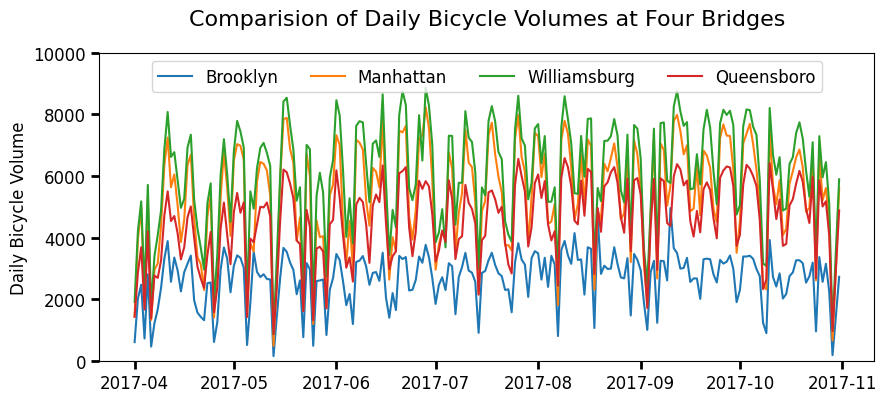

In [8]:
## A chart showing the time series plots of daily bicycle counts at the four bridges

# define a DataFrame consists of four time Series of daily counts at four bridges
df = NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

# create a line chart
plt.figure(figsize=(10,4)) # define the plot size by width and height in inch
plt.plot(df) #plot() method plots line chart. df's index is used as the x-axis

# plt.xlabel() and plt.ylabel() specifies the axis labels 
plt.ylabel('Daily Bicycle Volume',
           fontsize=12
          ) 
plt.xlabel('') 

# plt.tick_params() specifies parameters for axis ticks
plt.tick_params(axis='both',
                labelsize=12,
                direction='out', #ticks are ouside the chart
                length=6, # length of the ticks
                width=2, # width of the ticks
                colors='k', # tick color
                labelcolor = 'k', # tick label color
                #grid_color='k', # gridline color
                grid_alpha=0.5) # Transparency of gridlines

plt.ylim(ymax=10000,ymin=0)

plt.legend(['Brooklyn','Manhattan','Williamsburg','Queensboro'], 
           loc='upper center',
           ncol=4,
           bbox_to_anchor=(0.5,1),
           fontsize=12)

plt.title('Comparision of Daily Bicycle Volumes at Four Bridges',fontsize=16,pad=20)
plt.show();

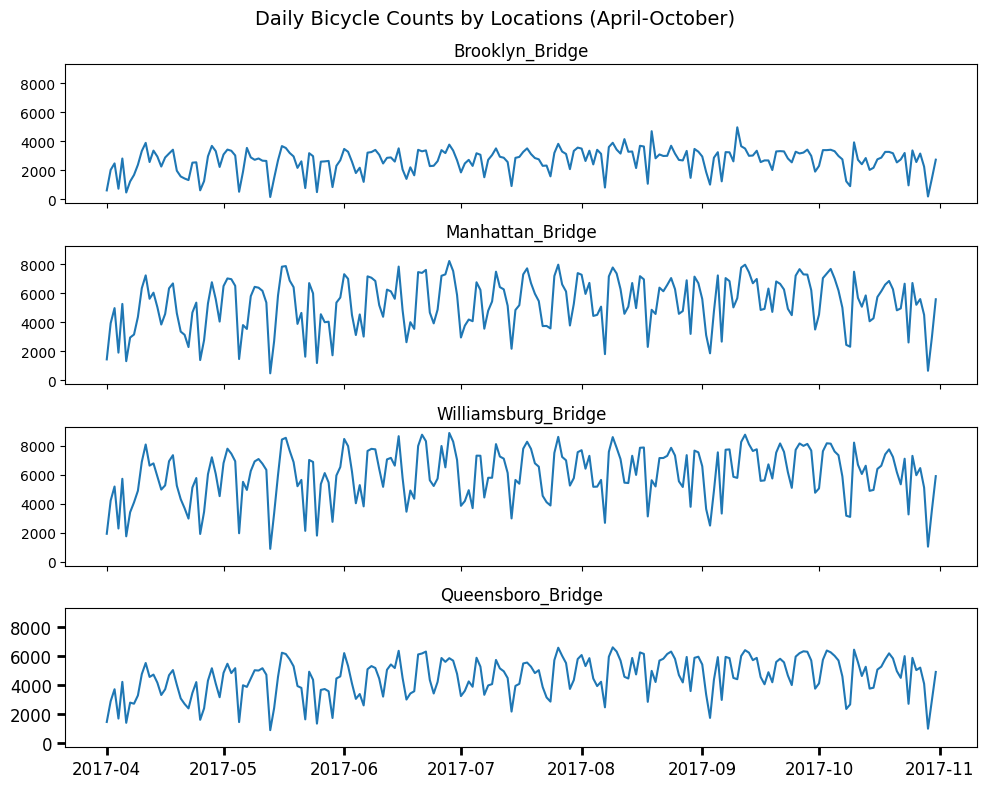

In [9]:
# a chart with four subplots that each shows the trend line of daily bicycle counts at a location

df = NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

# define a chart with subplots using plt.subplots(rows, columns, ...)
fig, axs = plt.subplots(4,1, 
                        sharey=True, #subplots share y-axis
                        sharex=True, # subplots share x-axis
                        tight_layout=True, 
                        figsize=(10,8))

# draw subplot one by one
for i,col in enumerate(axs):
    axs[i].plot(df.iloc[:,i]) #plot a line chart for column i in the DataFrame object - df
    axs[i].set_title(df.columns[i]) # set_title() is a method for Axis objects. It is used to define the title of chart. Here we use the column name as the chart title


# Add a centered super title to the figure.
plt.suptitle('Daily Bicycle Counts by Locations (April-October)',
             fontsize=14
            )

# Customize ticks if needed
plt.tick_params(axis='both',
                labelsize=12,
                direction='out', 
                length=6, 
                width=2,
                colors='k',
                labelcolor = 'k',
                #grid_color='k', 
                grid_alpha=0.5)



# define ranges of y-axis. The four time series are in different magnitude. 
# We could manually define the range for y-axis if we are not satisfied with the automatically defined range
#plt.ylim(ymax=14000,ymin=0)

# Display all open figures
plt.show(); 

### Area Chart


An area chart is a **stacked line chart** with areas between lines filled with a color. 

We can use matplotlib.pyplot.stackplot() to create such plots.

Suggested Exercises:
1. Create an area chart (i.e., a chart of stacked trend lines) that shows daily total bicycle count over time, with the counts at different locations being represented by different colored areas

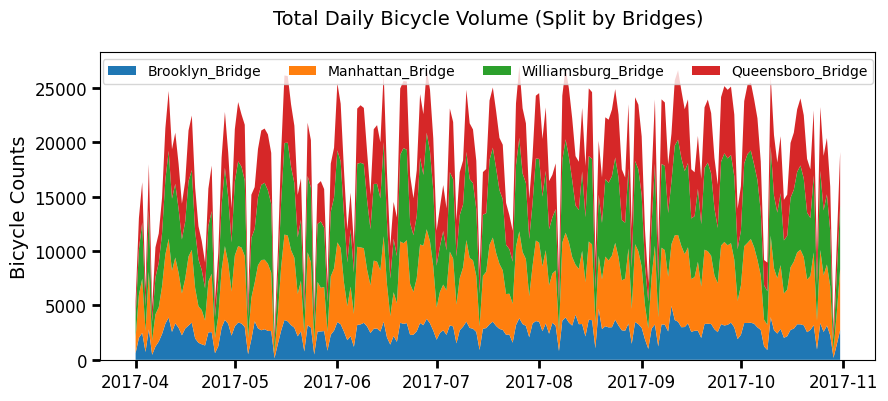

In [10]:
# Generate a stacked trend line that shows stacked daily volumes over time
# We use matplotlib.pyplot.stackplot(x, y)

df=NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

plt.figure(figsize=(10,4))
plt.stackplot(df.index, # X is 1xM
               df.T, # Y must be NxM. Here, the transpose operator is important
              labels=df.columns) # labels for the 

plt.ylabel('Bicycle Counts',
           fontsize=14
          )
plt.xlabel('')


plt.tick_params(axis='both',
                labelsize=12,
                direction='out', 
                length=6, 
                width=2,
                colors='k',
                grid_color='k', 
                grid_alpha=0.5)

# Because we put four series in a single plot, it is important to use legend to differentiate them
plt.legend(df.columns, # use columns names as the labels for each series. We can also directly define a list like ['Brooklyn','Manhattan','Williamsburg','Queensboro']
           loc='upper center', # location of the legend
           ncol=4, # layout of the labels. Here means four columns
           #bbox_to_anchor=(0.5,1), # It defines the relative location of the legend box  
           fontsize=10)

plt.title('Total Daily Bicycle Volume (Split by Bridges)',
          fontsize=14,
          pad=20 # add space in points between the plot title and the plot
         )

plt.show();

### Histogram

Histogram shows the distribution of observations on a range of non-overlaping bins

matplotlib.pyplot.hist() can be used to create histogram

Suggested Exercises:
1. Create a histogram to show the distribution of "Total".
2. [optional] Approximate the data of "Total" with a normal distribution. Visualize the distribution plot and overlay it with the the histogram.
3. Create a plot with four subplots arranged as a 2x2 matrix. Each subplot is a histogram showing the distribution of daily bicycle count at each location


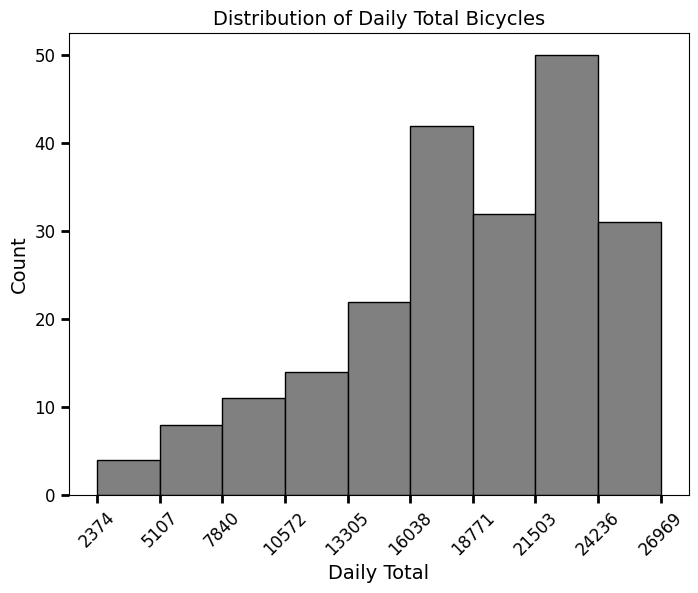

In [11]:
# Generate a histogram to show the distribution of daily bicycle count

plt.figure(figsize=(8,6))

counts, bins, patches = plt.hist(NY_bicycle_ts.Total,  #  column for visulization
                                 bins=9, # the number of bins
                                 density = False, # False - show count, True - normalized to show percentage
                                 cumulative = False, # False - probability distribution, True - cumulative distribution
                                 facecolor='grey', # color of bins
                                 edgecolor='black') # color of bin edges

plt.ylabel('Count',fontsize=14)
plt.xlabel('Daily Total',fontsize=14)

plt.tick_params(axis='both',
                labelsize=12,
                direction='out', 
                length=6, 
                width=2,
                colors='k',
                grid_color='k', 
                grid_alpha=0.5)

#in this example, xticks are set to be the boundaries of bins and they are rotated by 45 degree
plt.xticks(ticks=bins,
           rotation=45
          ) 

#plt.ylim(ymax=60,ymin=0)

plt.title('Distribution of Daily Total Bicycles',fontsize=14)

plt.show();

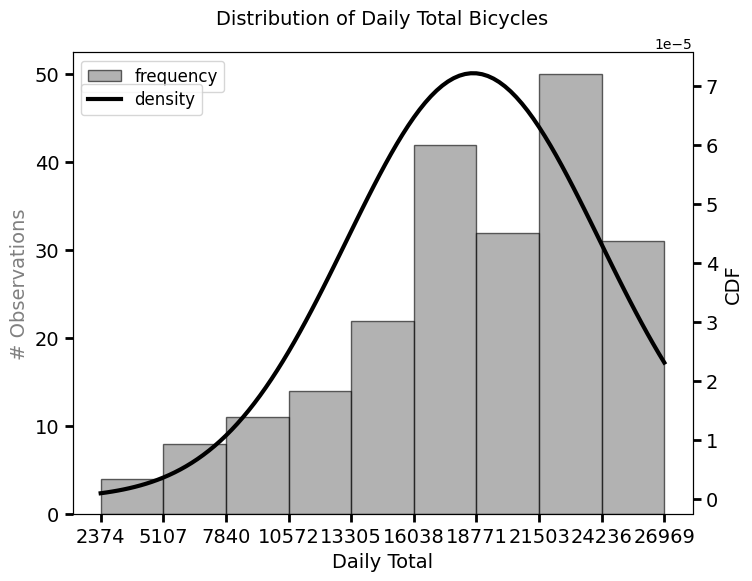

In [12]:
# Fit a normal distribution to "Total" and overlay it with the histogram. 

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx() # Create a twin Axes sharing the xaxis. This is a critical step for creating a chart with double y-axis

# create a histgram for column "Total" on ax1
counts, bins, patches = ax1.hist(NY_bicycle_ts.Total, 
                                 bins=9,
                                 density = False,
                                 cumulative = False,
                                 facecolor='grey',
                                 edgecolor='black',
                                 alpha=0.6)

ax1.set_ylabel('# Observations',fontsize=14,color="grey")
ax1.set_xlabel('Daily Total',fontsize=14)

ax1.tick_params(axis='both',
                labelsize=14,
                direction='out', 
                length=6, 
                width=2,
                colors='k',
                grid_color='k', 
                grid_alpha=0.5)

ax1.legend(['frequency'], 
           loc='upper left',
           ncol=2,
           bbox_to_anchor=(0,1),
           fontsize=12)

# fit the normal distribution to "Total" and visualize the fitted normal distribution on ax2

from scipy.stats import norm #import the normal distribution module
mu, std = norm.fit(NY_bicycle_ts.Total) # fix a normal distribution for the column "Total". mu and std are estimated model parameters: mean and standard deviation
xmin = NY_bicycle_ts.Total.min()
xmax = NY_bicycle_ts.Total.max()
x = np.linspace(xmin, xmax, 100) # define an arange of x for the fitted normal distribution. Use numpy.linespace(min, max, N) to generate an array with N evenly spaced numbers with a range
p = norm.pdf(x, mu, std) # use normpdf(x, my,std) to find the cumualtive probability on the range of x

ax2.plot(x, 
         p,
         linewidth=3,
         color='black')

ax2.set_ylabel('CDF', fontsize=14,color='black')

ax2.tick_params(axis='both',
                labelsize=14,
                direction='out', 
                length=6, 
                width=2,
                colors='k',
                grid_color='k', 
                grid_alpha=0.5)

ax2.legend(['density'], 
           loc='upper left',
           ncol=2,
           bbox_to_anchor=(0,0.95),
           fontsize=12)

# additional set up for the entire chart
plt.xticks(ticks=bins,
           rotation=45
          ) #xticks are set to be the boundaries of bins and they are rotated by 45 degree

plt.title('Distribution of Daily Total Bicycles',
          fontsize=14,
          pad=20)

plt.show();

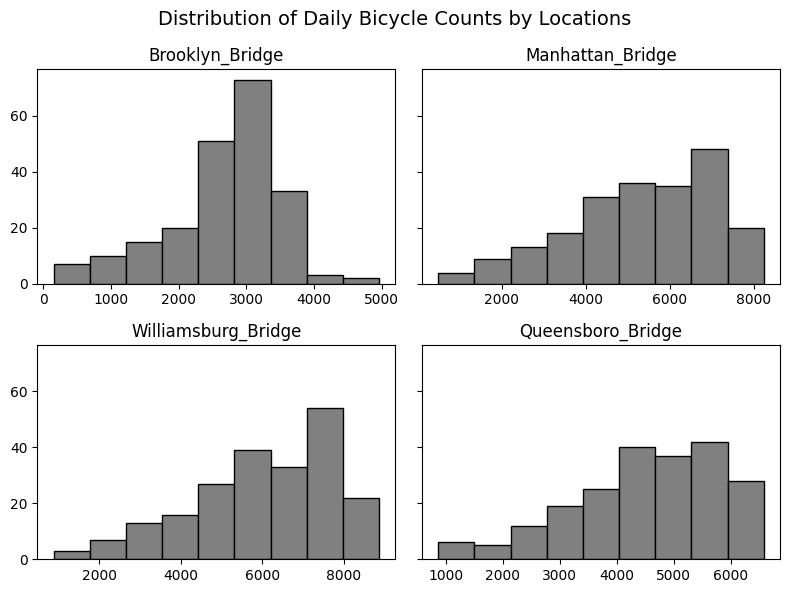

In [13]:
# generate four subplots arranged as a 2 by 2 matrix. 
# Each subplot is a histogram showing the distribution of daily bicycle count at each location

# matplotlib.pyplot.subplots(nrows,ncolumns) can be used to create a figure of subplots

df=NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

fig, axs = plt.subplots(2,2, 
                        sharey=True, 
                        sharex=False, # here we do not share x-axis because the data range varies by locations 
                        tight_layout=True, 
                        figsize=(8,6))

# Flatten the axs array because axs is an 2x2. After flattening it, the iteration process only needs one index
axs_flat = axs.flatten()

for i, ax in enumerate(axs_flat):
    ax.hist(df.iloc[:, i], 
            bins=9, 
            facecolor='grey', 
            edgecolor='black')
    ax.set_title(df.columns[i])
    

plt.suptitle('Distribution of Daily Bicycle Counts by Locations',
             fontsize=14
            )

plt.show();

### Bar Chart

Bar charts are methods of visualizing data by one or multiple categories

pandas.DataFrame.plot(kind='bar' or 'barh') is a good tool for generating bar/column charts based on DataFrame objects, like summary tables we created in last learning module

matplotlit.pyplot.table() for adding a table to a chart

Suggested Exercises:
1. Generate a stacked column chart that shows the total bicycle counts at each bridge over the seven month period. Split the count by weather types
2. Add a table to the bottom of the chart created in step 1. [hint: use matplotlit.pyplot.table to add a table to the bottom of the chart]
3. Create a clustered (i.e., unstacked) column chat that show the mean daily bicycle volume by locations and weather types. Columns at the same location are clustered as a subgroup.  
4. Create a stacked bar chart that hows the total bicycle counts at each bridge over the seven month period. Split the count by weather types. Order the bars in the descending order of total bicycle counts [hint: use sort_values() to rank order bars]

Weather                   N       R      T
Brooklyn_Bridge      399657  136437  37435
Manhattan_Bridge     794366  272356  77212
Williamsburg_Bridge  885226  322814  87015
Queensboro_Bridge    662085  246144  65576


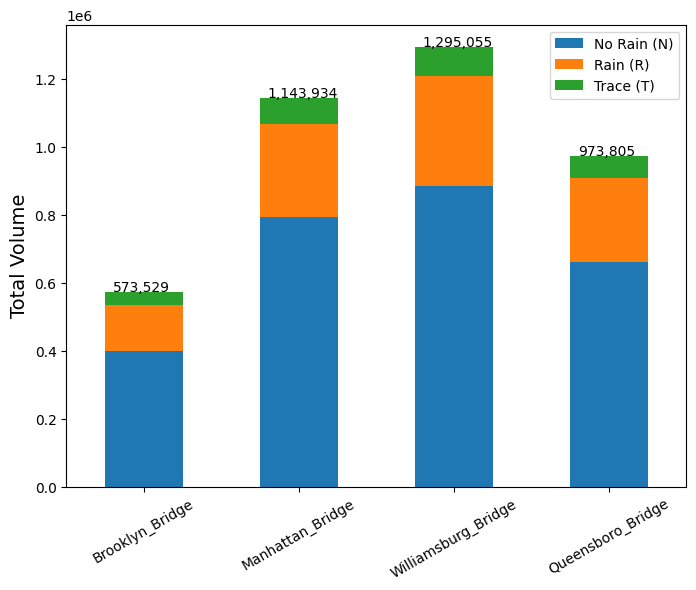

In [14]:
# generate a (vertical) bar chart using plot(kind='bar')
df = NY_bicycle_ts.groupby('Weather')[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

my_table = df.sum().T # This generate a summary table with rows to be bridges and columns to be weather types
print(my_table)

ax = my_table.plot(kind='bar', # use DataFrame.plot(kind='bar') to display a bar chart. Each row of the summary table is displayed as a vertical bar
                   stacked=True, # stacked=True returns stacked bar chart
                   figsize=(8,6)
                  ) 

plt.xticks(rotation=30)

plt.legend(['No Rain (N)','Rain (R)','Trace (T)'], # columns of the summary table are weather types in an alphabetical order
           loc='best',
           ncol=1, # display labels as a column
           fontsize=10)

plt.ylabel('Total Volume',
           fontsize=14)


# use matplotlib.pyplot.annotate() to show the label of total bicycle count at each bridge
for i in range (4):
    plt.annotate('{:,}'.format(my_table.sum(axis=1).iloc[i]), #my_table.sum(axis=1) calculate the total bicycle count at each bridge 
                 (i-0.2, my_table.sum(axis=1)[i]+40), # location to print the data label
                 fontsize=10)
    

plt.show();

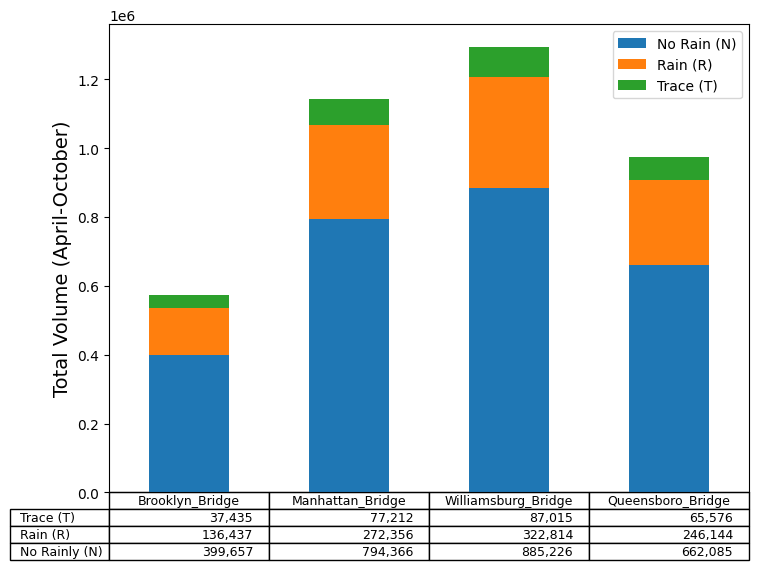

In [15]:
# The combination of bar chart and the summary table is a good stratgy to show both detailed quantitative information and the data visualization

#  Let's add a table at the bottom of the stacked chart 

# generate bar chart with an embedded table

# Get the data needed
df=NY_bicycle_ts.groupby('Weather')[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

my_table=df.sum().T

# Create the bar chart
my_table.plot(kind='bar',
              stacked=True,
              figsize=(8,6))
plt.xticks([]) # not showing xticks
plt.legend(['No Rain (N)','Rain (R)','Trace (T)'], 
           loc='best',
           ncol=1,
           fontsize=10)
plt.ylabel('Total Volume (April-October)',fontsize=14)


# Add a table at the bottom of the axes
data = my_table.T.applymap('{:,}'.format) # define data in the table

# matplotlib.pyplot.table() can display a table
add_table = plt.table(cellText=np.flipud(data), #np.flipud() flips the order of rows in the array along the first axis. This is important because the bar chart stacks data by showing the first row of data at the bottom and the last row on the top
                      rowLabels=['Trace (T)','Rain (R)','No Rainly (N)'], # row labels of the table
                      colLabels=data.columns.to_list(), # colum labels of the table
                      loc='bottom',
                     ) 

add_table.set_fontsize(16) # adjust the font size of the table

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.1)

plt.show();


Weather                        N            R            T
Brooklyn_Bridge      3050.816794  1977.347826  2673.928571
Manhattan_Bridge     6063.862595  3947.188406  5515.142857
Williamsburg_Bridge  6757.450382  4678.463768  6215.357143
Queensboro_Bridge    5054.083969  3567.304348  4684.000000


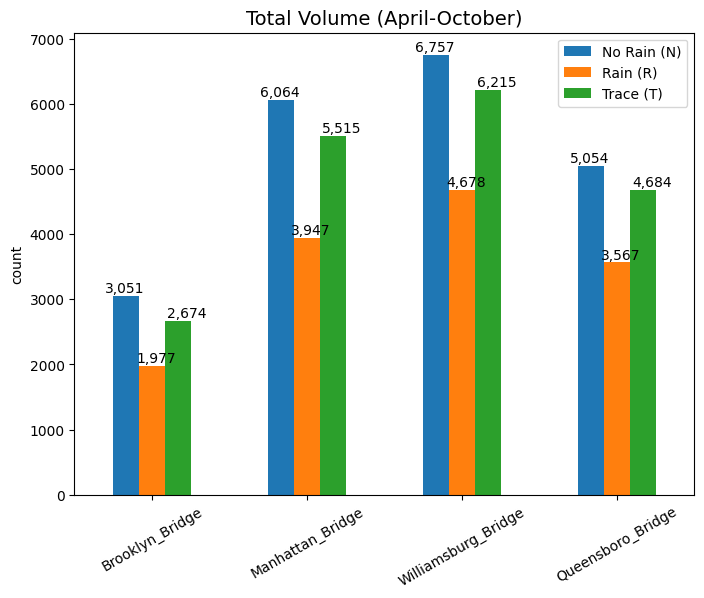

In [16]:
# Create a clustered (i.e., unstacked) column chat that show the mean daily bicycle volume by locations and weather types. Columns at the same location are clustered as a subgroup.  

df=NY_bicycle_ts.groupby('Weather')[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

my_table = df.mean().T

ax = my_table.plot(kind='bar',
                   stacked=False, # stacked=False returns clustered bar chart

                   figsize=(8,6)) 
print(my_table)

plt.xticks(rotation=30)

plt.legend(['No Rain (N)','Rain (R)','Trace (T)'], 
           loc='best',
           ncol=1,
           fontsize=10)

plt.title('Total Volume (April-October)',fontsize=14)
plt.ylabel('count')

# print data label on the top of each bar
for i in range (my_table.shape[0]):
    for j in range (my_table.shape[1]):
        plt.annotate('{:,.0f}'.format(my_table.iloc[i,j]),
                     (i-0.3+0.2*j, # x-axis location
                      my_table.iloc[i,j]+50)) # y-axis location

plt.show();

         Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  \
Weather                                                           
N                 399657            794366               885226   
R                 136437            272356               322814   
T                  37435             77212                87015   

         Queensboro_Bridge  
Weather                     
N                   662085  
R                   246144  
T                    65576  
Brooklyn_Bridge         573529
Queensboro_Bridge       973805
Manhattan_Bridge       1143934
Williamsburg_Bridge    1295055
dtype: int64


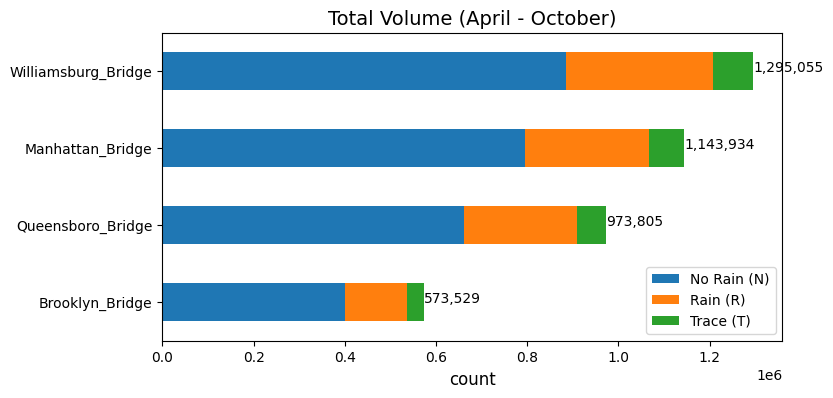

In [17]:
# Horizonal bar chart is commonly used to visualize ordered data.

# Create a (horizontal) bar chart using plot(kind='barh'). 

# define the table to be visualized
df = NY_bicycle_ts.groupby('Weather')[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]
my_table = df.sum() 
print(my_table)

# re-order the table according the column sum in the  ascending order 
the_table=my_table[my_table.sum().sort_values(ascending=True).index]
print(the_table.sum())

# plot stacked horizontal bar chart
the_table.T.plot(kind='barh', # horizontal bar chart
                 stacked=True, # stacked
                 figsize=(8,4)
                )
plt.title('Total Volume (April - October)', 
           fontsize=14
          )

plt.xlabel('count',
          fontsize = 12
          )

plt.legend(['No Rain (N)','Rain (R)','Trace (T)'], 
           loc='best',
           ncol=1,
           fontsize=10)

# add the cumulative amount to each stacked bar to each bar
for i in range(my_table.shape[1]):
    # use matplotlib.pyplot.text(x, y, s) to show the data labels
    plt.annotate('{:,}'.format(the_table.sum()[i]),
                (the_table.sum()[i],i)
                )
plt.show();

### Pie Chart


Use a pie chart to show the proportional constituions of a categorical variable

matplotlib.pyplot.pie()

Suggested Exercise:
1. Create a pie chart to show the proportions of total bicycle counts at each of the four bridges. Label each slice with the location and the percentage of total bicycle counts there. Pull the slice "Brooklyn_Bridge" out slightly. 

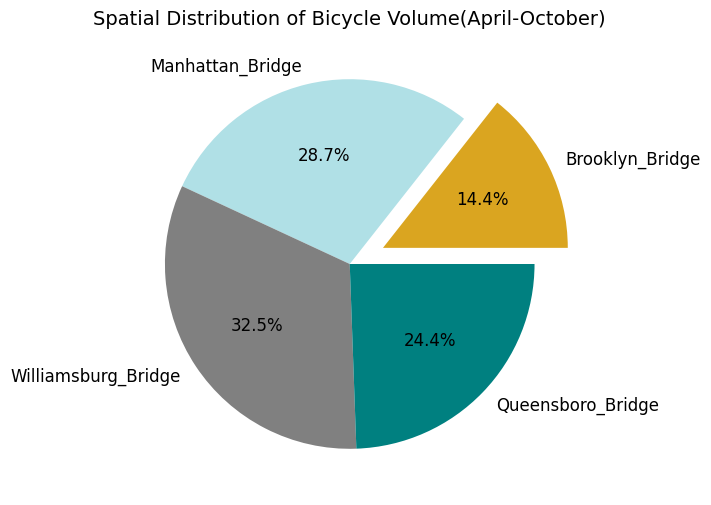

In [18]:
# use a pie chart to show the proportions of total bicycle counts by locations


df=NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

fig = plt.figure(figsize=(6,6))
patches, texts, autotexts= plt.pie(df.sum(), 
                                   labels=df.columns,
                                   explode=[0.2,0,0,0],  # To pull a slice out a little bit, use explode to define it
                                   colors=['goldenrod','powderblue','grey','teal'], # a list defining the colors for individual slices
                                   autopct='%1.1f%%', #format of the data
                                   textprops={'fontsize': 12}
                                  )

for text in texts:
    text.set_fontsize(12)  # Change the font size to 12

plt.title('Spatial Distribution of Bicycle Volume(April-October)', 
          fontsize=14, 
          loc='center')

plt.show();


### Box Plots

A boxplot shows the distribution of a variable based on quartile measures.

matplotlib.pyplot.boxplot()

Suggested Exercise:

1. Create a chart that shows four boxplots of daily bicycle count at the four bridges, respectively.

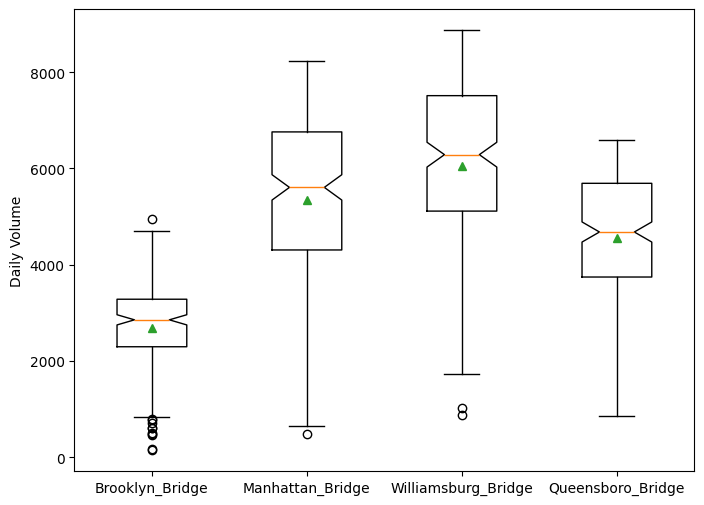

In [19]:
# generate a boxplot for each of mulitple numerical variables

df = NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

plt.figure(figsize=(8,6))

# use matplotlib.pyplot.boxplot()
plt.boxplot(df,
            notch=True, # notch at median
            labels=df.columns, # display labels for boxplots
            showcaps=True, # display the caps on the ends of whiskers. 
            showfliers=True, # how the outliers beyond the caps.
            showmeans=True # display mean 
           ) 

plt.ylabel('Daily Volume')

plt.show();

### Scatter Chart

A scatter plot visualizes the relationship between two numerical variables

matplotlib.pyplot.scatter()\
pandas.plotting.scatter_matrix

Suggested Exercisese:
1. create a scatter chart to find how if daily bicycle count and temperature are correlated. Since the dataset has both daily high and low temperatures, we create two scatter plots overlap with each other. Differentiate the two scatter plots by colors. 
2. add three histograms to the chart in step 1. Two histograms are overlaid with each other and sit on the top, which show the marginal distributions of observations "High_Temp_F' and "Low_Temp_F", respectively. The third histogram is on the right side of the scatter plot, which shows the marginal distribution of "Total".
3. create a scatter chart to examine if daily bicycle counts at Manhattan bridge and Brooklyn Bridge are corelated. Color observations according to "High_Temp_F"
4. Create a scatter chart matrix that summarizes the correlation bewteen any two numerical variables in the dataset



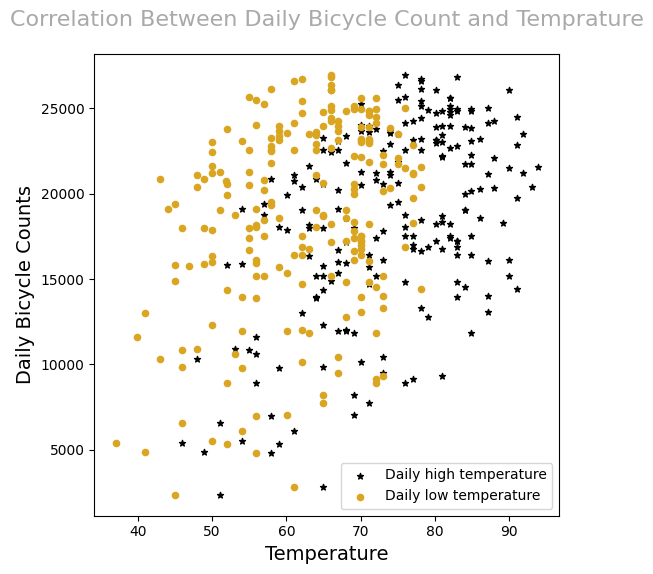

In [20]:
# use scatter plot to show the relationship between daily bicycle count with temperature

# In this example, we overlay two scatter plots together. They respectively show the correlation between "Total" and high/low temperature
# we use different symbols to differentiate them

plt.figure(figsize=(6,6))

plt.scatter(NY_bicycle.High_Temp_F, # x
            NY_bicycle.Total, # y
            color='black', # color of the symbol for data points
            marker='*', # type of symbol for representing data points
            s=20 # size of  the symbol
           )

plt.scatter(NY_bicycle.Low_Temp_F,
            NY_bicycle.Total,
            color='goldenrod',
            marker='o',
            s=20)

plt.legend(['Daily high temperature','Daily low temperature'])

plt.xlabel('Temperature',
           fontsize=14
          )
plt.ylabel('Daily Bicycle Counts',
           fontsize=14
          )

plt.title('Correlation Between Daily Bicycle Count and Temprature',
          fontsize=16, 
          color='darkgrey',
          pad=20
         )

plt.show();

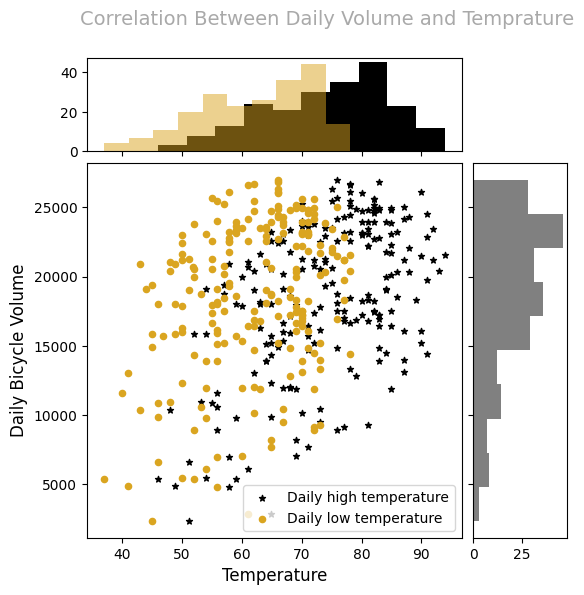

In [21]:
# We can project scatter plots to x and y axis to show marginal distributions

# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, # two rows, two columns
                      width_ratios=(4, 1), height_ratios=(1, 4), # Defines the relative widths of the columns, and hights of the rows
                      left=0.1, right=0.9, bottom=0.1, top=0.9, #Extent of the subplots as a fraction of figure width or height.
                      wspace=0.05, hspace=0.05 # space between subplots
                     )

# Create the Axes.
ax = fig.add_subplot(gs[1, 0]) # ax is the axis object for the scaptter plots. It is at the bottom left(i.e., [1,0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax) # ax_histx is the axis object for the histgrams along x axis. It is at the top left (i.e. [0,0])
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax) # ax_histx is the axis object for the histgrams along y axis. It is at the bottom right (i.e. [1,1])
ax_histx.tick_params(axis="x", 
                     labelbottom=False
                    ) # no ticks at the bottom
ax_histy.tick_params(axis="y", 
                     labelleft=False
                    ) # no ticks on the left

# scatter plot between Total and High_Temp_F
ax.scatter(NY_bicycle_ts.High_Temp_F,
           NY_bicycle_ts.Total,
           color='black',
           marker='*',
           s=20)

# scatter plot between Total and Low_Temp_F
ax.scatter(NY_bicycle_ts.Low_Temp_F,
           NY_bicycle_ts.Total,
           color='goldenrod',
           marker='o',
           s=20)

# histogram of High_Temp_F along x-axis
ax_histx.hist(NY_bicycle_ts['High_Temp_F'],
              alpha=1,
              color='black'
             )

# histogram of Low_Temp_F along y-axis
ax_histx.hist(NY_bicycle_ts['Low_Temp_F'],
              alpha=0.5,
              color='goldenrod'
             )

# histogram of Total along y-axis
ax_histy.hist(NY_bicycle_ts['Total'], 
              orientation='horizontal',
              color='grey'
             )


# add additional elements to the entire plot
ax.legend(['Daily high temperature','Daily low temperature'])
ax.set_xlabel('Temperature',
              fontsize=12
             )
ax.set_ylabel('Daily Bicycle Volume',
              fontsize=12
             )
plt.suptitle('Correlation Between Daily Volume and Temprature',
             fontsize=14, 
             color='darkgrey'
            )
plt.show();

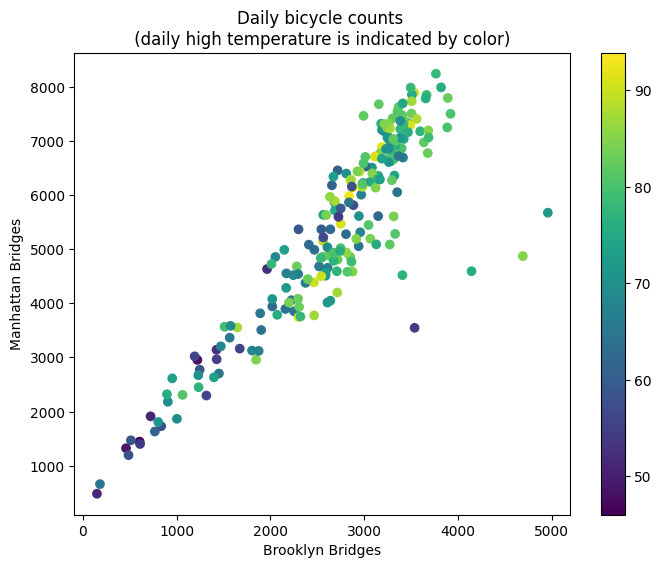

In [22]:
# visualize the correlation between two daily bicycle counts at two locations. Use color to indicate the highest temperature of the day

plt.figure(figsize=(8,6))
plt.scatter(x=NY_bicycle_ts.Brooklyn_Bridge,
            y=NY_bicycle_ts.Manhattan_Bridge,
            c=NY_bicycle_ts.High_Temp_F,
            cmap='viridis') # plt.scatter() returns a scatter plot of two numerical columns to show there association. The color is the 'High_Temp_F' value of each data point
plt.xlabel('Brooklyn Bridges') 
plt.ylabel('Manhattan Bridges')
plt.colorbar() # displays the colorbar
plt.title('Daily bicycle counts \n (daily high temperature is indicated by color) ')
plt.show();

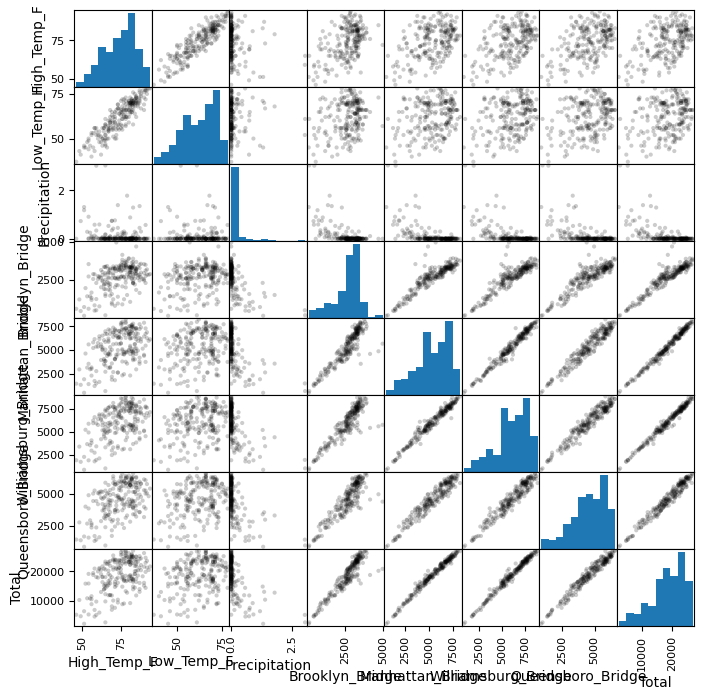

In [23]:
# to generate satter plot matrix, it is convenient to use pandas.plotting.scatter_matrix()

pd.plotting.scatter_matrix(NY_bicycle_ts,
                           alpha=0.2,
                           figsize=(8,8),
                           color='black') #pd.plotting.scatter_matrix() generates the matrix of scatter plots
plt.show();

### Bubble Chart


A bubble chart is a three dimensional data visiualization (x, y, bubble size)

use matplotlib.pyplot.scatter()

Suggested exercises:
1. calculate mean, standard deviation, and minimum of daily bicycle count by locations. Visualize the result using a bubble chart: x-axis is standard deviation, y-axis is mean, and bubble size is minimum

      Brooklyn_Bridge  Manhattan_Bridge  Williamsburg_Bridge  \
std             854.7            1746.5               1755.8   
mean           2680.0            5345.5               6051.7   
min             151.0             484.0                874.0   

      Queensboro_Bridge  
std              1306.9  
mean             4550.5  
min               865.0  


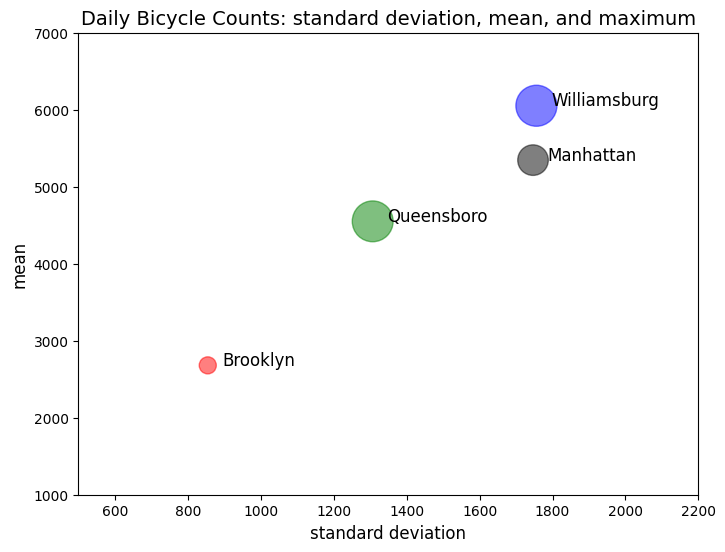

In [24]:
# visualize the standard deviation, mean, and minimum at different locations using a bubble chart
df=NY_bicycle_ts[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]
df_B=df.agg(['std','mean','min'])
print(df_B.round(1))

plt.figure(figsize=(8,6))
# create the bubble plot by using standard deviation as the x axis, mean as the y axis, and max as the bubble size
plt.scatter(df_B.iloc[0,:],
            df_B.iloc[1,:],
            df_B.iloc[2,:],
            color=['red','black','blue','green'],
            alpha=0.5
           )

plt.axis([500, 2200, 1000,7000]) # define the range of axes

plt.xlabel('standard deviation',fontsize=12)
plt.ylabel('mean', fontsize=12)

bridges=['Brooklyn','Manhattan','Williamsburg','Queensboro']

# add a label to each bubble
for i in range(4):
    plt.annotate(bridges[i], 
                 (df_B.iloc[0, i]+40, df_B.iloc[1, i]), 
                 fontsize=12)

plt.title('Daily Bicycle Counts: standard deviation, mean, and maximum',fontsize=14)
plt.show();

### Heat Map


Three dimensional data visiualization (row, column, color)

use matplotlib.pyplot.pcolor()

Suggested exercise:
1. use a heat map to show the mean daily bicycle volume by days of week and bridges. The color bar should be provided.

           Brooklyn  Manhattan  Williamsburg  Queensboro
Day                                                     
Monday       2615.1     5449.1        5974.9      4500.1
Tuesday      2773.1     5991.9        6524.4      4964.4
Wednesday    2998.3     6439.9        7144.5      5308.8
Thursday     2944.3     6167.7        6940.0      5233.0
Friday       2588.6     5255.6        6107.9      4620.8
Saturday     2367.9     3983.4        4957.4      3739.1
Sunday       2488.8     4189.6        4778.2      3536.0


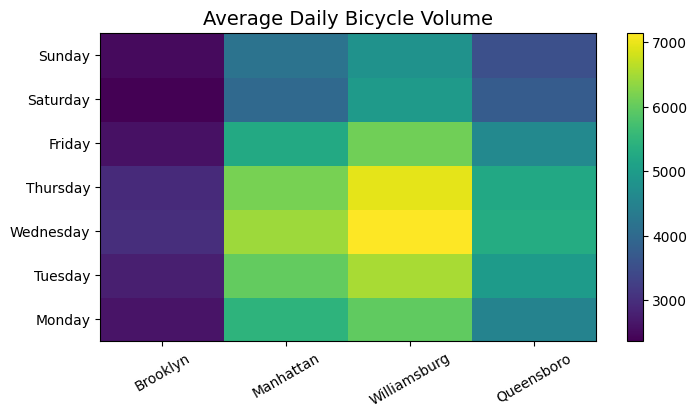

In [25]:
## generate a heat map using plt.pcolor(x,y,value to be colored)

df=NY_bicycle_ts[['Day','Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']]

# Rename columns
df.columns = ["Day", "Brooklyn", "Manhattan", "Williamsburg", "Queensboro"]

#create a matrix that shows the mean daily volume at each location and each day of week
df_B=df.groupby('Day').mean()
print(df_B.round(1))

plt.figure(figsize=(8,4))
plt.pcolor(df_B,
           cmap='viridis'
          )

plt.yticks(np.arange(0.5, len(df_B.index), 1), 
           df_B.index
          ) # define y ticks that are the index values
plt.xticks(np.arange(0.5, len(df_B.columns), 1), 
           df_B.columns,
           rotation=30
          ) # define x ticks that are the four locations

plt.title('Average Daily Bicycle Volume',fontsize=14)

plt.colorbar() # show a color bar to indicate the values in the table

plt.show();

## Data Visualization using plotly

https://plotly.com/

In this section, we illustrate a few examples of data visualization using plotly, which supplements matplotlib.

### Box plot



Using plotly to generate box plots is very convenient. Given a dataset, we just identify the numerical variable that we would like to show distribution and one or multiple categorical variables by which we would like to compare box plots.

plotly.express.box()

Suggested exercise:
1. Create a chart that shows the four boxplots of daily bicycle counts at the four bridges, respectively.
2. Create a chart that shows the 28 boxplots of daily bicycle counts that each is at a particular location and a day of week. Cluster boxplots by locations.

In [26]:
# plotly is a package for data visulization, https://plotly.com/
#import plotly.express as px

#pandas.melt() can convert a wide table into a long table. Here, we combine columns of bicycle counts at four bridges into two columns: one column showing the location, and one colum showing the count
df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Bridge','Count']
print(df)

# draw boxplots
plt.figure(figsize=(8,6))
fig = px.box(df, # the datatable we would like to visualize using boxplot
       x='Bridge', # define the categorical variable
       y='Count', # define the numerical variable for showing boxplots
       points='all', # display the raw data points if we choose to do so
       notched=True
      )


fig.update_xaxes(title_text=' ') # modify x axis label
fig.show();

# when we move the mouse on the plots, detailed information is displayed. plotly generates charts highly interactive with users

           Day  Temperature             Bridge  Count
0     Saturday         46.0    Brooklyn_Bridge    606
1       Sunday         62.1    Brooklyn_Bridge   2021
2       Monday         63.0    Brooklyn_Bridge   2470
3      Tuesday         51.1    Brooklyn_Bridge    723
4    Wednesday         63.0    Brooklyn_Bridge   2807
..         ...          ...                ...    ...
851     Friday         62.1  Queensboro_Bridge   5181
852   Saturday         68.0  Queensboro_Bridge   4069
853     Sunday         64.9  Queensboro_Bridge    965
854     Monday         55.0  Queensboro_Bridge   2924
855    Tuesday         54.0  Queensboro_Bridge   4883

[856 rows x 4 columns]


<Figure size 800x600 with 0 Axes>

In [27]:
# Let's consider boxplots across multiple categorical variables 
df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Bridge','Count']
df.head()

plt.figure(figsize=(12,6))
fig = px.box(df,
       x='Bridge',
       y='Count',
       points='all',
       color='Day', # use color to further split plots by "Day"
       notched=True
      )

fig.update_xaxes(title_text=' ') # Updating x axis albel
fig.show();

<Figure size 1200x600 with 0 Axes>

### 2D Countour Chart



plotly.graph_objects.Histogram2dContour(x,y) uses a 2D countour to show the distribution of observations on two variables.

Suggested Exercises:
1. use a 2D contour chart to visualize the distribution of observations on "High_Temp_F" and "Total".
2. combine scatter chart, 2D contour, and side histograms to visualize the distributions of observations on "High_Temp_F" and "Total".


In [28]:
# import the graph_objects module from plotly
#import plotly.graph_objects as go 

In [29]:
fig = go.Figure(
    go.Histogram2dContour(
        x = NY_bicycle_ts['High_Temp_F'],
        y = NY_bicycle_ts['Total'],
        #ncontours = 12, Sets the maximum number of contour levels. 
        colorscale = 'Blues'
    ))

fig.update_layout(xaxis_title='Daily Highest Temperature (F)',
                  yaxis_title='Daily Bicycle Total',
                  height=600,
                  width=600
                 )

fig.show();

In [30]:
#  Histogram2dContour + Scatter + Histogram 

x=NY_bicycle_ts['High_Temp_F']
y=NY_bicycle_ts['Total']

# create a figure object, and then add difference components using .add_trace()
fig = go.Figure()


fig.add_trace(go.Histogram2dContour(
    x=x, # value on x-axis
    y=y, # value on y-axis
    xaxis = 'x', # Sets a reference between this trace’s x coordinates and a 2D cartesian x axis
    yaxis= 'y',  # Sets a reference between this trace’s y coordinates and a 2D cartesian y axis  
    colorscale = 'Blues'
))


fig.add_trace(go.Scatter(
        x=x, 
        y=y, # value on 
        xaxis = 'x', 
        yaxis = 'y',
        mode = 'markers',
        marker = dict(
            color = 'rgba(0,0,0,0.3)',
            size = 5
        )
    ))

# add distribution of "Total"
fig.add_trace(go.Histogram(
        y=y,  # y is the variable for generating the historgram along y-axis
        xaxis = 'x2', # a new xaxis object for this histogram
        marker = dict(
            color = 'rgba(0,0,0,0.5)'
        )
    ))

# add distribution of "High_Temp_F"
fig.add_trace(go.Histogram(
        x=x, # x is the variable for generating the historgram along x-axis
        yaxis = 'y2', # a new yaxis object for this histogram
        marker = dict(
            color = 'rgba(0,0,0,0.5)'
        )
    ))


##
fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85], # segment for xaxis
        showgrid = False
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85], # segment for yaxis
        showgrid = False
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.85,1], # segment for xaxis2
        showgrid = False
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.85,1], # segment for axis2
        showgrid = False
    ),
    height = 800,
    width = 800,
    bargap = 0, #bars will touch
    hovermode = 'closest', # hover only shows info for the nearest point
    showlegend = False, #suppresses legend globally
    xaxis_title='Daily Highest Temperature (F)',
    yaxis_title='Daily Bicycle Total'
)
##//

fig.show();

### Tree and Sunburst maps

Tree map is a method to visualize **hierarchical data**. 

Suggested exercise:
1. Create a Dataframe that summarizes the daily bicycle count in a cierachical structure: NU/Day/Bridge. 
2. visulize the hierarchical dataframe as a tree map. Use color to indicate the average daily highest temperature
3. visualzie the hierarchical dataframe as a sunburst map. Use color to indicate the average daily highest temperature

In [31]:
# Create a Dataframe that summarizes the daily bicycle count in a cierachical structure: NU/Day/Bridge

df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )

df.columns=['Day','Temperature','Bridge','Count']
df['Bridge'] = df['Bridge'].str.replace('_Bridge', '', regex=False) # we remove the suffix to simplify the values for "Bridge" column
df

,Day,Temperature,Bridge,Count
0,Saturday,46.0,Brooklyn,606
1,Sunday,62.1,Brooklyn,2021
2,Monday,63.0,Brooklyn,2470
3,Tuesday,51.1,Brooklyn,723
4,Wednesday,63.0,Brooklyn,2807
...,...,...,...,...
851,Friday,62.1,Queensboro,5181
852,Saturday,68.0,Queensboro,4069
853,Sunday,64.9,Queensboro,965
854,Monday,55.0,Queensboro,2924


In [32]:
#visulize the hierarchical dataframe as a tree map. Use color to indicate the average daily highest temperature

fig = px.treemap(df, # the dataset for creating treemap
                 path=[px.Constant('NY'),'Bridge', 'Day'], # the path shows the sequence for the hierarchical structure. px.Constant(East River")  adds a dummy column containing the same value 'NY'
                 values='Count', # the size of each leaf
                 color='Temperature',# the color of each leaf
                 color_continuous_scale='RdBu' # color scale
                )

fig.show()

In [33]:
# visulize the hierarchical dataframe as a sunburst map. Use color to indicate the average daily highest temperature

fig = px.sunburst(df,
                  path=[px.Constant('East River'),'Bridge','Day'], # the path shows the sequence for the hierarchical struccture. px.Constant(East River") adds a dummy column containing the same value 'NY'
                  values='Count', # the size of each leaf
                  color='Temperature',# the color of each leaf
                  color_continuous_scale='RdBu' # color scale
                )

fig.show()

## Data Visulization using Seaborn

### Line Charts

Using seaborn.replot or seaborn.linechart, we can easily create trend lines with error bars or confidence intervals.

seaborn.replot() plots data and a linear regression model fit.
seaborn.lineplot() plots

Suggested Exercises:
1. create a chart with trend lines of daily bicycle counts over days of week and by locations. Provide a 95% confidence interval for each trend line.
2. create a chart with trend lines of daily bicycle counts over days of week and by locations. Provide an error bars showing standard deviations.

In [34]:
# a module for data visualization, https://seaborn.pydata.org/index.html
#import seaborn as sns 

# set theme
#sns.set_theme(style="ticks")

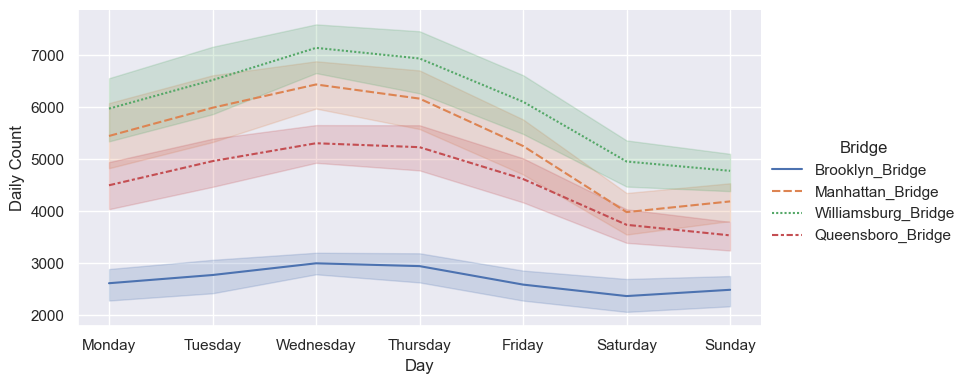

In [47]:
sns.set_theme(rc={'figure.figsize':(12,8)})

df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Bridge','Daily Count']
df.head()

# use seaborn.relplot() to generate line charts
sns.relplot(data=df, 
            x="Day", 
            y="Daily Count", 
            kind="line",  # this indicates the type of chart
            err_style="band",  # To specify error bars, default is band, other choices include "bars"
            ci=95,            # To specify the error bar size, default is 95, other choices include "sd"
            hue='Bridge', #color of the line depends on the type of bridge
            style='Bridge', # stype of the line depends on the type of bridge
            height=4,  # height of figure in inch
            aspect=2   # width to high ratio
           )


plt.show();

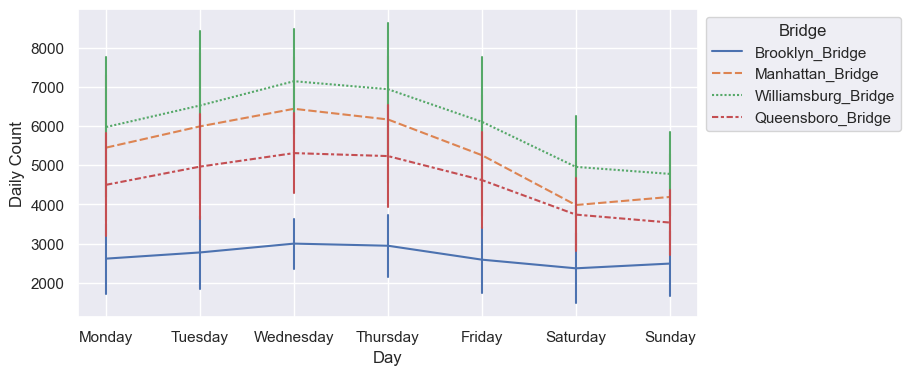

In [36]:
sns.set_theme(rc={'figure.figsize':(8,4)}) #'rc" mean run command. This overrides matplotlib’s configuration

df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Bridge','Daily Count']
df.head()

ax = sns.lineplot(data=df,
             x='Day',
             y='Daily Count',
             err_style="bars",  # To specify error bars, default is band, other choices include "bars"
             ci='sd',            # To specify the error bar size, default is 95, other choices include "sd"
             hue='Bridge',           
             style='Bridge'
            ) 
sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))

plt.show();

### Histogram

seaborn can easily generate a histgram with a kernel density estimation (kde) of the data distribution.

Suggested Exercise:
1. show the histogram of "Total" with a kde


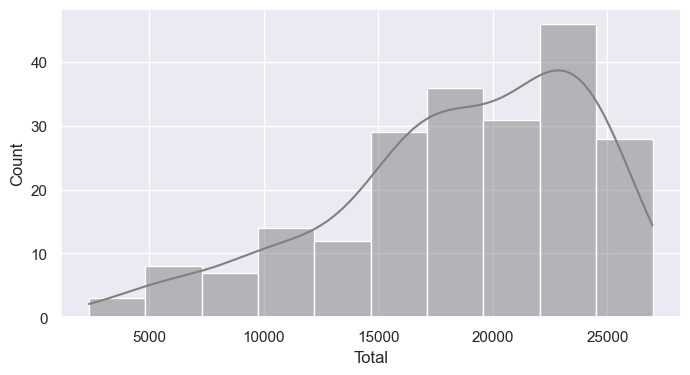

In [37]:
sns.histplot(data=NY_bicycle_ts, 
             x="Total", 
             kde=True, # kde=True will display the kernel density estimation
             color='grey')

sns.set_theme(rc={'figure.figsize':(8,6)}) 

plt.show();

### Bar Charts

Using seaborn, bar and column charts can be created easily.

seaborn.barplot()

Suggested exercises:
1. create a longe dataframe by stacking observations at four bridges as rows.
2. create a chart with four subplots arranged as a 2x2 matrix. 
    1. a column chart shows the mean daily bicycle count by locations
    2. a bar chart shows the mean daily bicycle count by locations
    3. a clustered column chart shows the mean daily bicycle count by locations and weather types. Columns at the same locations are clustered as a subgroup.
    4. a clustered bar chart shows the mean daily bicycle count by locations and weather types. Columns at the same locations are clustered as a subgroup.

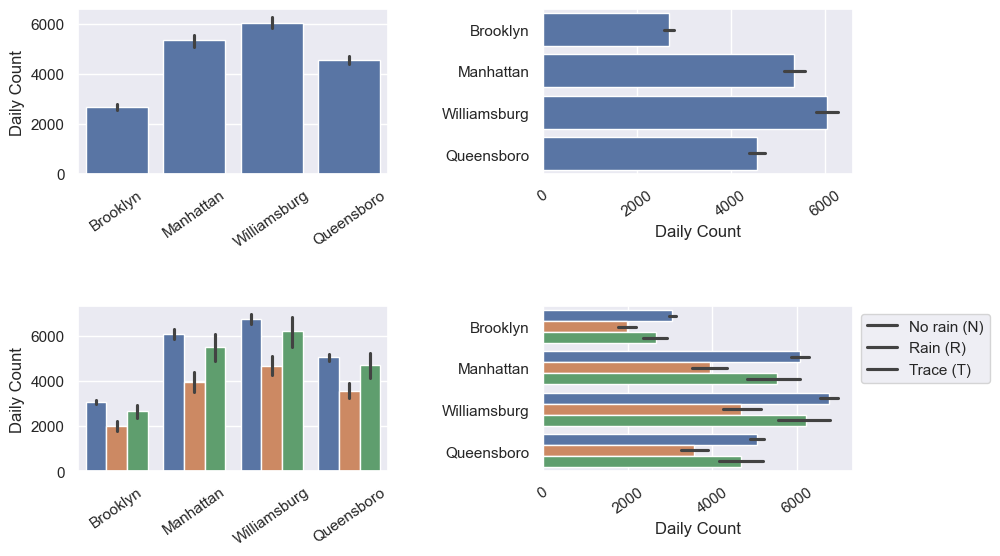

In [38]:
df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F','Weather'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Weather','Bridge','Daily Count']
df['Bridge'] = df['Bridge'].str.replace('_Bridge', '', regex=False) # we remove the suffix to simplify the values for "Bridge" column
df.head()

fig,ax =plt.subplots(2,2,figsize=(10,6))


# top left plot 
# when x is a categorical variable, and y is a numerical variable, a vertical bar chart is created
sns.barplot(data=df,
            x='Bridge',
            y='Daily Count',
            ax=ax[0][0]
           )
ax[0][0].set_xlabel('')

# top right plot 
# when y is a categorical variable, and x is a numerical variable, a horizontal bar chart is created
sns.barplot(data=df,
            x='Daily Count',
            y='Bridge',
            ax=ax[0][1]
           )
ax[0][1].set_ylabel('')

# bottom left
# when a new categorical variable is passed to the argument hue, a clustered bar chart is created
sns.barplot(data=df,
            x='Bridge',
            y='Daily Count',
            hue='Weather',   
            ax=ax[1][0]
           )

ax[1][0].legend(loc='upper left', 
                labels=['No rain (N)', 'Rain (R)', 'Trace (T)'],
                bbox_to_anchor=(2.5, 1)
               ) # move the legend 
ax[1][0].set_xlabel('')

# bottom right
sns.barplot(data=df,
            x='Daily Count',
            y='Bridge',
            hue='Weather',
            ax=ax[1][1]
           )
ax[1][1].set_ylabel('')
ax[1][1].legend().remove()


# Adjusting spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

for axes in ax.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=35)
    

plt.show();

### Boxplots and Variations

seanborn has a variety of plots to show data distributions, such as
- A **boxplot** display the distribution of data based on: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum
- A **stripplot** displays individual data points along a single axis
- A **swarmplot** is similar to a stripplot but avoids overlap between points by adjusting their positions along the categorical axis
- A **violinplot** displays the distribution of data across different categories using kernel density estimation (KDE) along with a boxplot.
- A **catplot** is a plotting function that allows us to create various categorical plots by specifying the kind parameter.

Suggested Exercises:
1. use boxplots to show the distribution of daily bicycle counts at individual locations
2. use stripplots to show the distribution of daily bicycle counts at individual locations
3. use swarmplots to show the distribution of daily bicycle counts at individual locations
4. use violinplots to show the distribution of daily bicycle counts at individual locations
5. use catplot to show the distributions of daily bicycle counts at individual locations. Try kind="box", "boxen", "violin", and "strip"
6. use violinplots to show the distributions of daily highest and daily lowest temperatures by day of weeks. Each violin plot is split into two parts, one for the highest temperature and the other for the lowest temperature

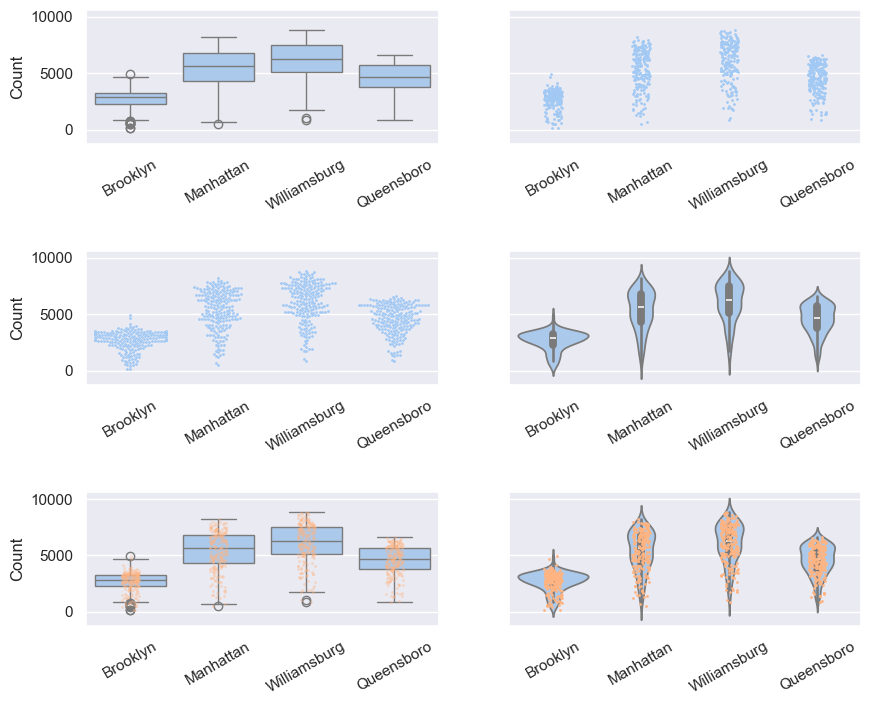

In [39]:
sns.set_palette('pastel') #deep, muted, bright, pastel, dark, colorblind

df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Bridge','Count']
df['Bridge'] = df['Bridge'].str.replace('_Bridge', '', regex=False) # we remove the suffix to simplify the values for "Bridge" column


fig, ax = plt.subplots(3, 2,
                       sharey=True,
                       figsize=(10,8)
                      )


sns.boxplot(x='Bridge',
            y='Count',
            data=df,
            ax=ax[0][0]
           )
ax[0][0].set_xlabel('')

sns.stripplot(x='Bridge',
              y='Count',
              data=df,
              ax=ax[0][1],
              size=2
             )
ax[0][1].set_xlabel('')


sns.swarmplot(x='Bridge',
              y='Count',
              data=df,
              ax=ax[1][0],
              size=2
             )
ax[1][0].set_xlabel('')

sns.violinplot(x='Bridge',
               y='Count',
               data=df,
               ax=ax[1][1]
              )
ax[1][1].set_xlabel('')


sns.boxplot(x='Bridge',
            y='Count',
            data=df,
            ax=ax[2][0]
           )
sns.stripplot(x='Bridge',
              y='Count',
              data=df,
              ax=ax[2][0],
              size=2,
              alpha=0.4
             )
ax[2][0].set_xlabel('')


sns.violinplot(x='Bridge',
               y='Count',
               data=df,
               ax=ax[2][1]
              )
sns.stripplot(x='Bridge',
              y='Count',
              data=df,
              ax=ax[2][1],
              size=2
             )
ax[2][1].set_xlabel('')

# Adjusting spacing between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.2)

# rotate xticks 
for axes in ax.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=30)

sns.set_theme(rc={'figure.figsize':(8,8)})

plt.show();

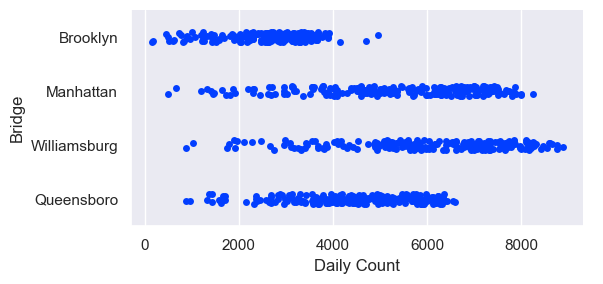

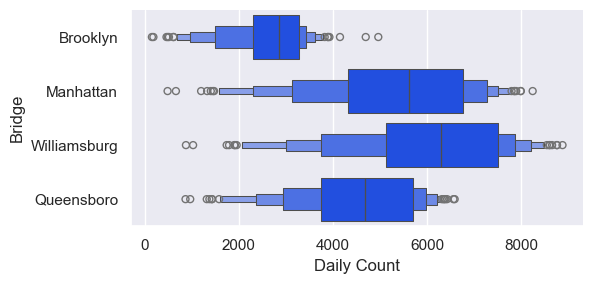

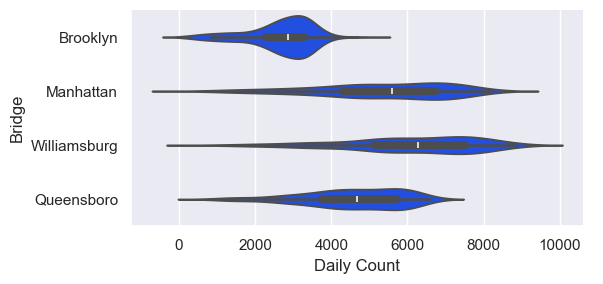

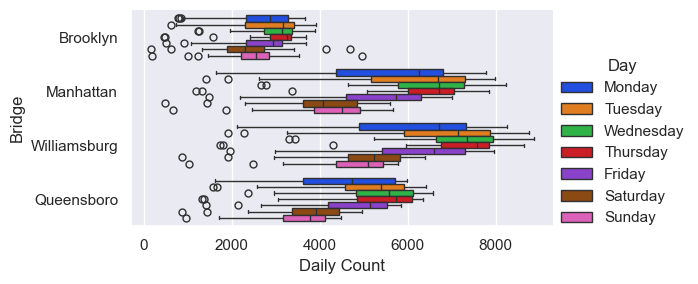

In [40]:
sns.set_palette('bright') #deep, muted, bright, pastel, dark, colorblind


df = pd.melt(NY_bicycle_ts,
             id_vars=['Day','High_Temp_F'], 
             value_vars=['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']
            )
df.columns=['Day','Temperature','Bridge','Daily Count']
df['Bridge'] = df['Bridge'].str.replace('_Bridge', '', regex=False) # we remove the suffix to simplify the values for "Bridge" column


sns.catplot(data=df,
            x='Daily Count',
            y='Bridge', 
            kind='strip',
            height=3, 
            aspect=2
           )

sns.catplot(data=df,
            x='Daily Count',
            y='Bridge', 
            kind='boxen',
            height=3, 
            aspect=2
           )

sns.catplot(data=df,
            x='Daily Count',
            y='Bridge', 
            kind='violin',
            height=3, 
            aspect=2
           )

sns.catplot(data=df,
            x='Daily Count',
            y='Bridge', 
            kind='box',
            hue='Day',
            height=3, 
            aspect=2)

#sns.set_theme(rc={'figure.figsize':(6,16)})

plt.show();

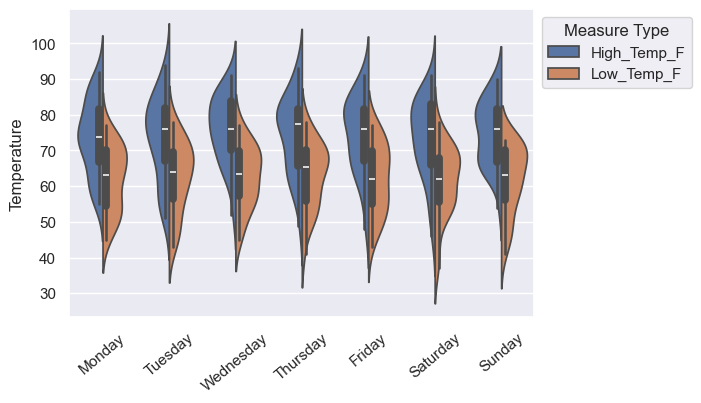

In [41]:
# In this example, we use double violins to compare high_temp_F with low_temp_f in terms of their distirbution by days of week
sns.set_palette('deep') #deep, muted, bright, pastel, dark, colorblind

df = pd.melt(NY_bicycle_ts,
             id_vars=['Day'], 
             value_vars=['High_Temp_F','Low_Temp_F']
            )
df.columns=['Day of Week','Measure Type','Temperature']
df.head()

plt.figure(figsize=(6,4))
ax = sns.violinplot(x='Day of Week',
               y='Temperature',
               data=df, 
               hue='Measure Type',
               split=True # This is the setting for creating double violins
              )

sns.move_legend(ax, "upper left",bbox_to_anchor=(1, 1))

ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set_xlabel('')

sns.set_theme(rc={'figure.figsize':(8,6)})

plt.show();

### Scatter and Joint Plots

seaborn has multiple kinds of plots to show the relationship between two variables
- **scatterplot**: a two-dimensional plot that displays individual data points as markers, with one variable on the x-axis and another variable on the y-axis
- **jointplot**:  it scombines univariate and bivariate plots to provide a comprehensive visualization of the relationship between two variables. There are different kinds, 'reg', 'hex', 'kde','hist'

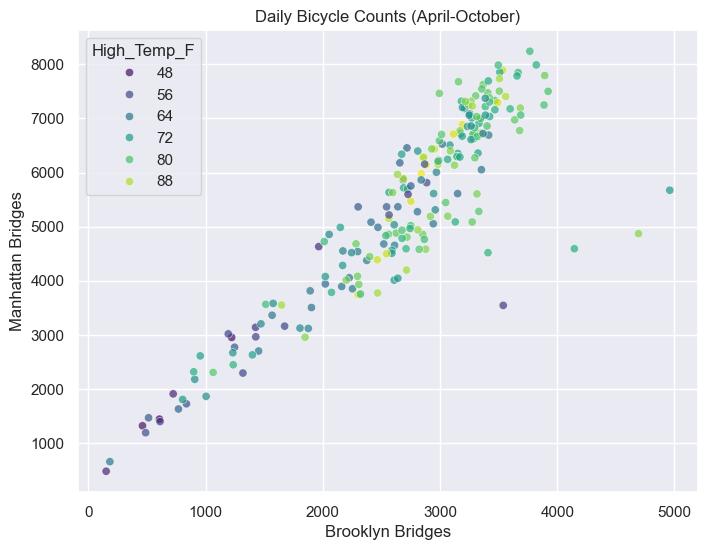

In [42]:
# visualize the correlation between two daily bicycle counts at two locations. Use color to indicate the highest temperature of the day

plt.figure(figsize=(8,6))

sns.scatterplot(x=NY_bicycle_ts.Brooklyn_Bridge,
                y=NY_bicycle_ts.Manhattan_Bridge,
                hue=NY_bicycle_ts.High_Temp_F, #color data points according to High_Temp_F
                palette ='viridis',
                alpha=0.7,
                legend='brief' #“auto”, “brief”, “full”, or False
               )


plt.xlabel('Brooklyn Bridges') 
plt.ylabel('Manhattan Bridges')

plt.title('Daily Bicycle Counts (April-October)')

sns.set_theme(rc={'figure.figsize':(6,6)})

plt.show();

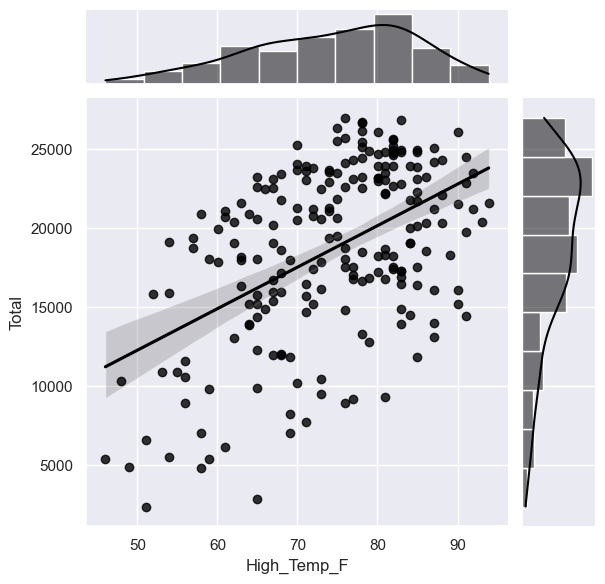

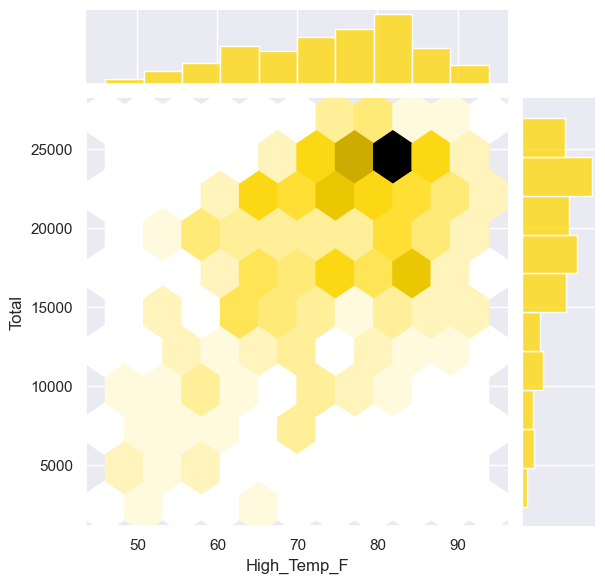

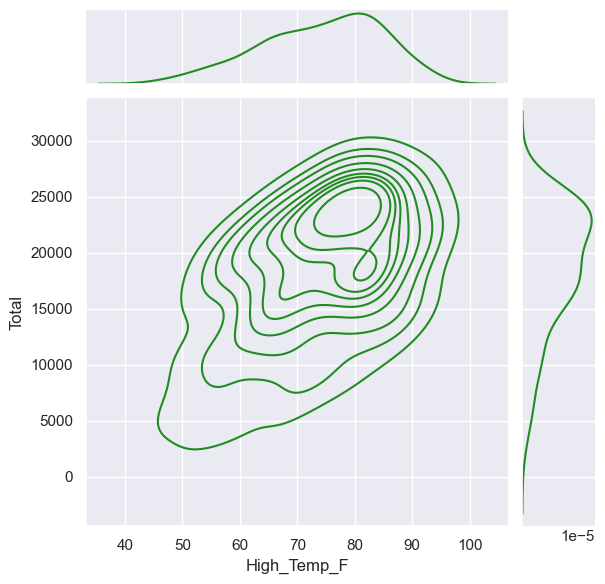

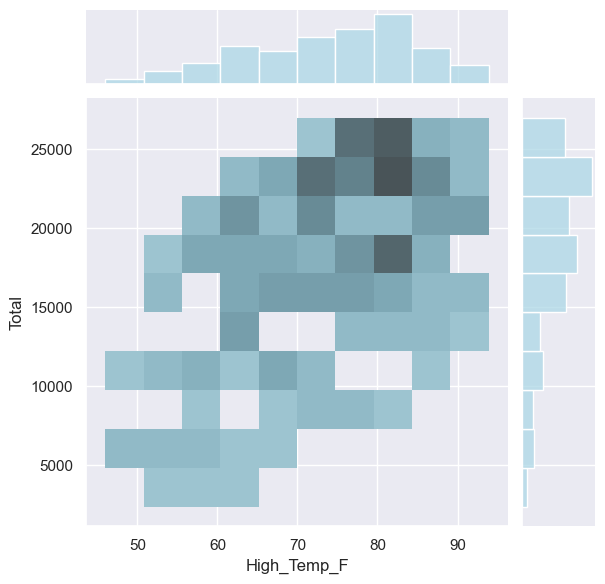

In [43]:
# there are different kinds of jointplot
sns.jointplot(data=NY_bicycle_ts,
              x='High_Temp_F',
              y='Total',
              color='black',
              kind='reg' #linar regression fit and univariate KDE curves
             ) 

sns.jointplot(data=NY_bicycle_ts,
              x='High_Temp_F',
              y='Total',
              color='gold',
              kind='hex' # hexagonal bins
             )

sns.jointplot(data=NY_bicycle_ts,
              x='High_Temp_F',
              y='Total',
              color='forestgreen',
              kind='kde') # draw both bivariate and univariate KDEs

sns.jointplot(data=NY_bicycle_ts,
              x='High_Temp_F',
              y='Total',
              color='lightblue',
              kind='hist') # joint histgram

#sns.set_theme(rc={'figure.figsize':(10,40)})

plt.show();

### Pairplot (scatter plot matrix)

seaborn has a **pairplot** function that can easily generate scatterplot matrix

Suggested practice:
1. produce the scatter plot matrix for all numerical variables in the dataset

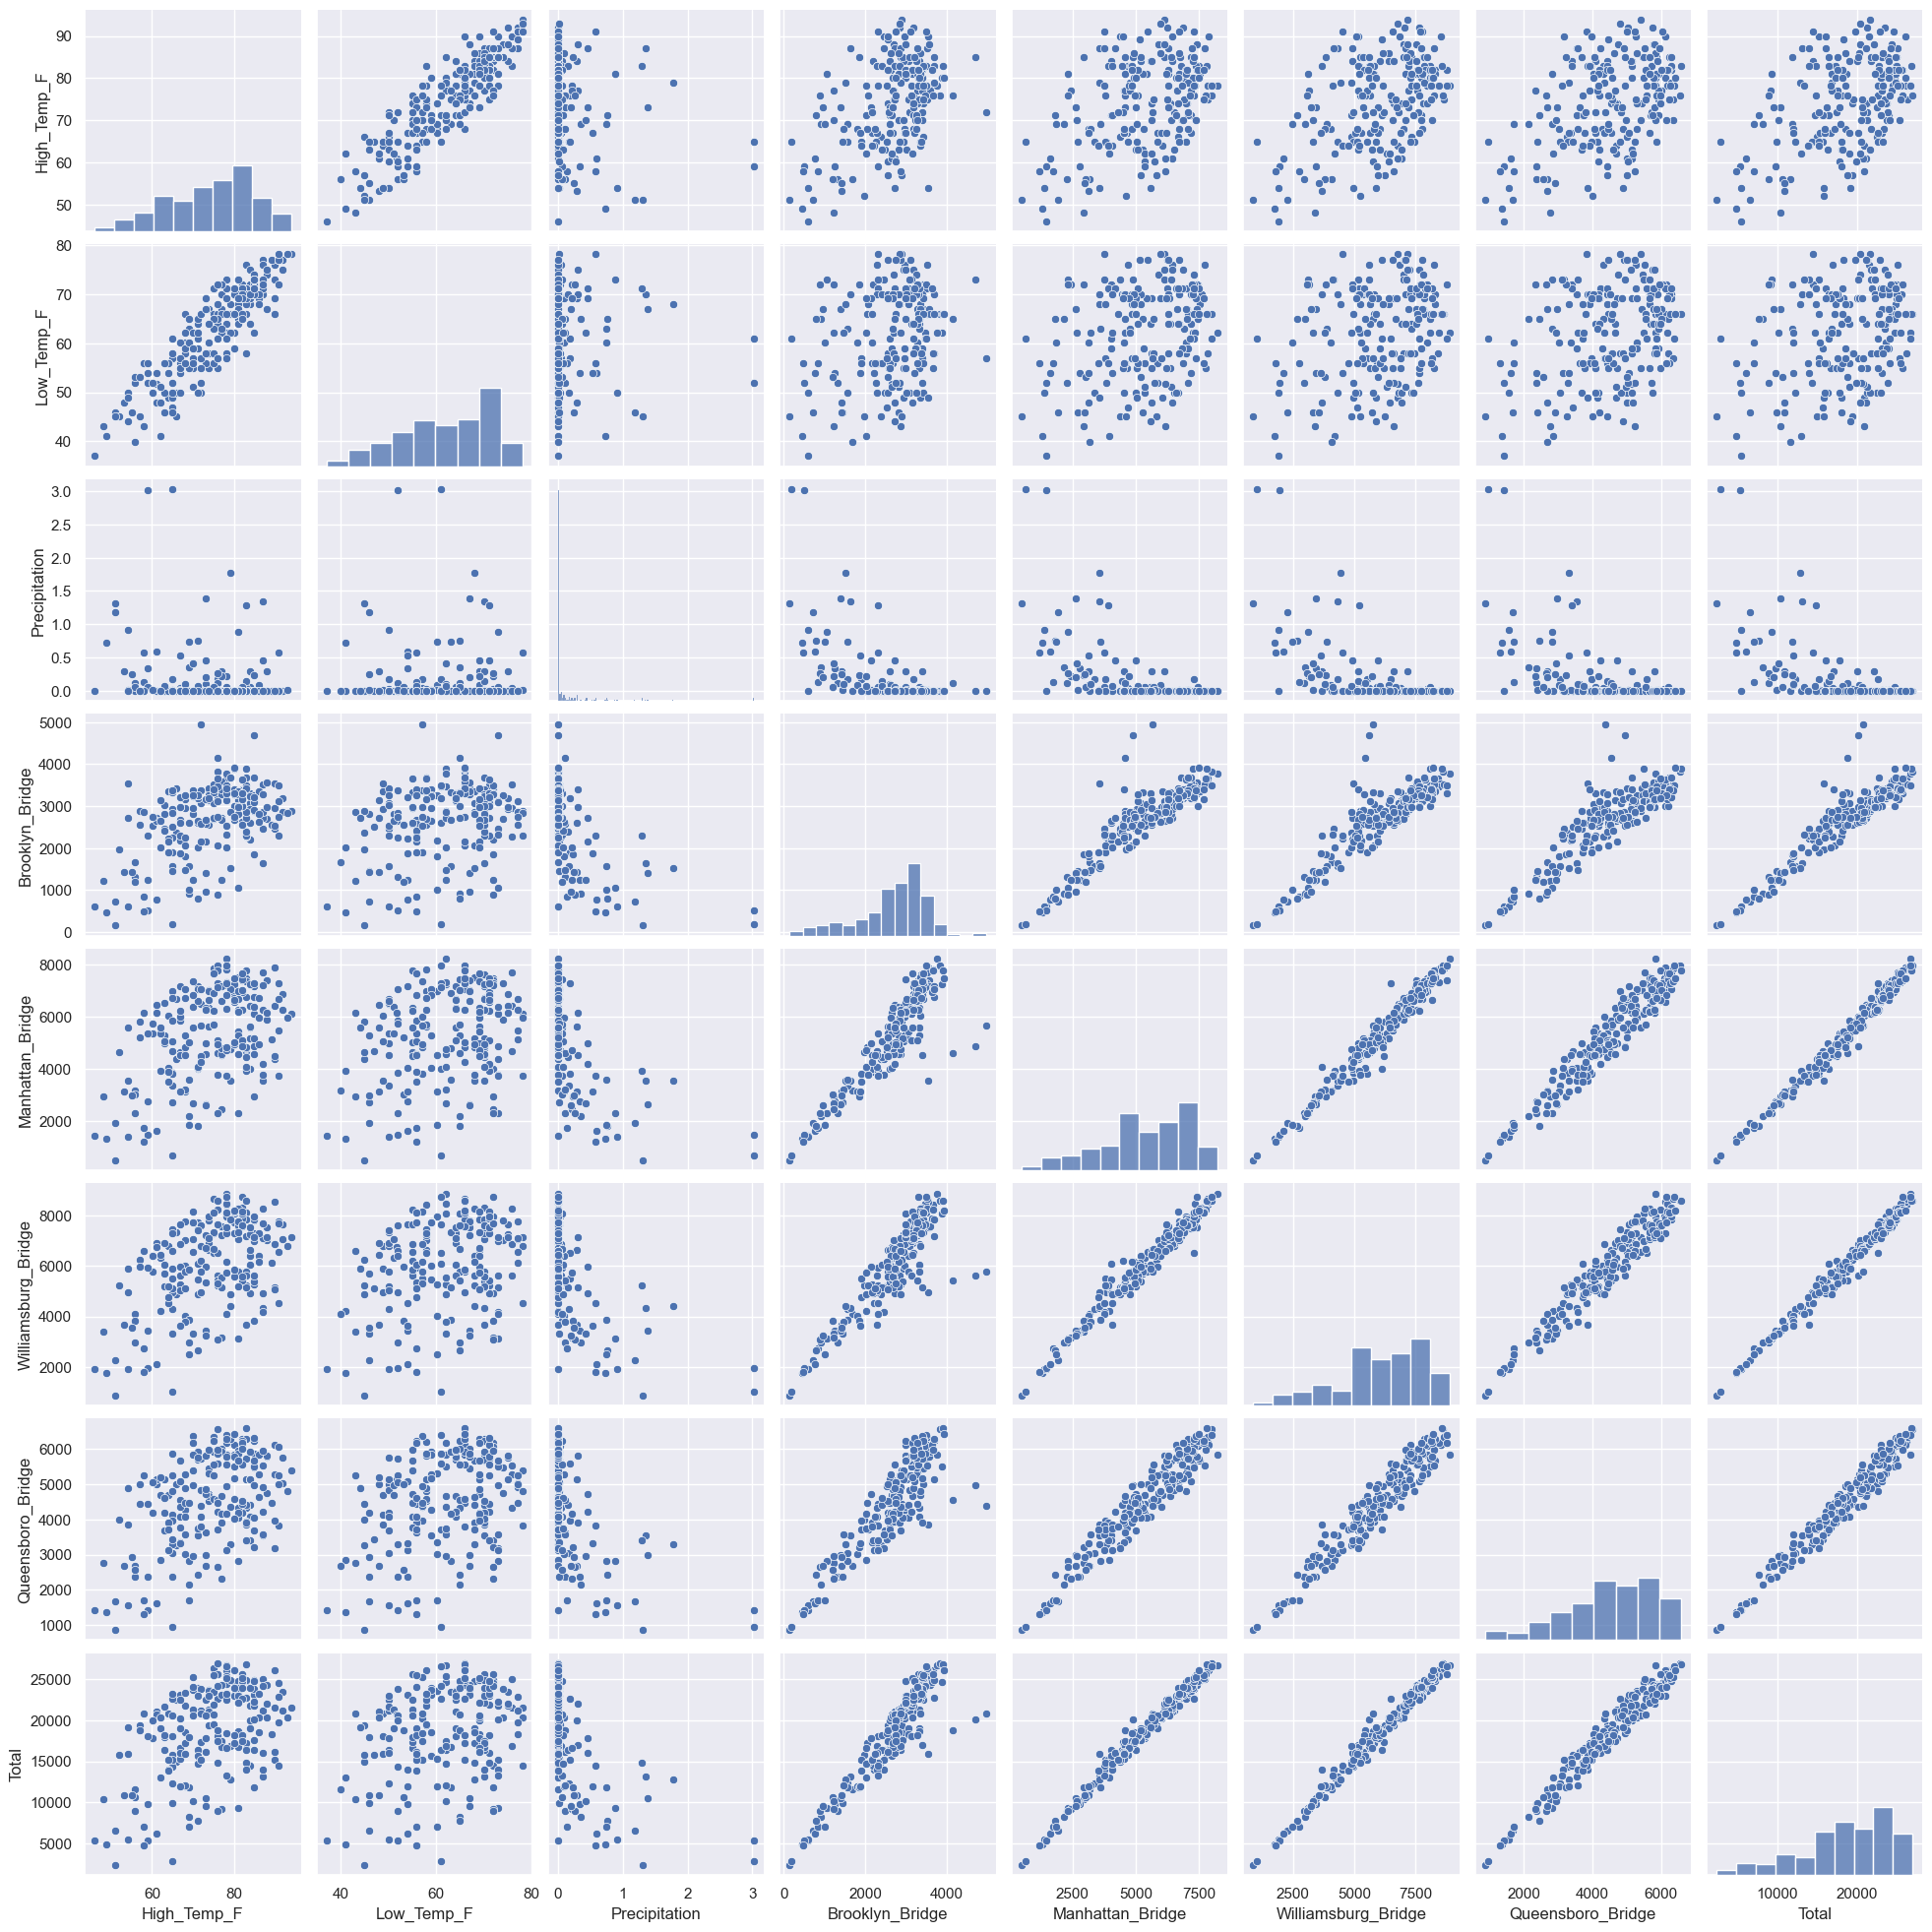

In [44]:
sns.pairplot(NY_bicycle_ts);

In [45]:
sns.reset_defaults() # sns.reset_defaults()